In [1]:
# Import all libraries needed for the tutorial
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv
# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import functools
from spectrum import *
from pylab import plot
from scipy import signal
import numpy as np
import time
from scipy import stats
# Enable inline plotting

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.23.0
Matplotlib version 2.2.2


In [3]:
from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2018, 8, 7)
end_date = date(2018, 8, 29)
column_selection = ["DAY_","Departement","SiteTheorique","eNodeBName","Secteur","CellName","CQImoyen_Convert","CROZON_DemandesVoix4G",
                    "CROZON_NombredeConnexionsPS","CROZON_SucceseRABData4G","CROZON_TraficDataDL4G","CROZON_SucceseRABPS4G","CoupuresData",
                    "CROZON_SucceseRABVoix4G","CSFB_Tot","CROZON_TDC4GData","CROZON_CoupureseRABData4G_old","CROZON_TDC4GData_Mobilite",
                    "CROZON_DemandesData4G","CROZON_TDC4GDataCluster","Badcoveragedetected_A2_","CROZON_TDC4GDataCluster_Mobilite",
                    "CROZON_CoupureseRABPS4G","CROZON_TDC4GPSCluster_Mobilite","CROZON_TDC4GPS","CQImoyen","CROZON_TDC4GPS_Mobilite",
                    "CROZON_TraficDataUL4G","CROZON_TDC4GPSCluster","ErabrelnormalQCI9","ErabRelQCi5","nbUEVoIPqualityOK","nbUEVoIPqualityNOK",
                    "Nbrtentatives_QCi5__TEAVoix","Nbrtentatives_QCi5__TEAVisio","Nbrtentatives_QCi1_","NbreConn_Voix","ErabrelnormalQCI5",
                    "ErabVoixRelease_Cellule","ErabrelnormalQCI8","NbHOPrepAttIFLB","ErabVoixRelease_Cluster","ErabrelnormalQCI6","NbdropsDataActifseNodeB",
                    "NbreConn_Data","NbHOExeAttIFLB","TBRe_transPUSCH","TBRetransPDSCH","TBtransPUSCH","SCTot","TBtransPDSCH","PingPong_HOinter_HOOscillation",
                    "TraficDataDL","PingPong_HOintra_HOOscillation","TraficDataUL","Traficvoix_Traficvoix_visio","VoIPqualitymeasinsuffstat"]

In [4]:
#Regroupe data of all dates 1
datestring = end_date.strftime("%Y%m%d")
Location1 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_1.CSV'
date_data = pd.read_csv(Location1, sep=';', encoding='latin-1')
data_1 = pd.read_csv(Location1, sep=';', encoding='latin-1')
data_1  = data_1[column_selection]
data_1 = data_1.replace(r'\N',np.nan)

for single_date in daterange(start_date, end_date):
    datestring = single_date.strftime("%Y%m%d")
    Location1 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_1.CSV'
    date_data = pd.read_csv(Location1, sep=';', encoding='latin-1')
    date_data = date_data[column_selection]
    date_data = date_data.replace(r'\N',np.nan)
    data_1 = data_1.append(date_data)

C:\Users\euripab\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (625,626,627,628) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Regroupe data of all dates 2
datestring = end_date.strftime("%Y%m%d")
Location2 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_2.CSV'
date_data = pd.read_csv(Location2, sep=';', encoding='latin-1')
data_2 = pd.read_csv(Location2, sep=';', encoding='latin-1')
data_2  = data_2[column_selection]
data_2 = data_2.replace(r'\N',np.nan)
for single_date in daterange(start_date, end_date):
    datestring = single_date.strftime("%Y%m%d")
    Location2 =  str('C:/Users/euripab/Desktop/ML Extraction/Modified Files/')+datestring+'_2.CSV'
    date_data = pd.read_csv(Location2, sep=';', encoding='latin-1')
    date_data = date_data[column_selection]
    date_data = date_data.replace(r'\N',np.nan)
    data_2 = data_2.append(date_data)

C:\Users\euripab\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (625,626,627,628) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Create Final Data File
alldata_kpis = data_1.append(data_2)
del data_1
del data_2
print(alldata_kpis.dtypes)
column_kpiselection = ["CQImoyen_Convert","CROZON_DemandesVoix4G",
                    "CROZON_NombredeConnexionsPS","CROZON_SucceseRABData4G","CROZON_TraficDataDL4G","CROZON_SucceseRABPS4G","CoupuresData",
                    "CROZON_SucceseRABVoix4G","CSFB_Tot","CROZON_TDC4GData","CROZON_CoupureseRABData4G_old","CROZON_TDC4GData_Mobilite",
                    "CROZON_DemandesData4G","CROZON_TDC4GDataCluster","Badcoveragedetected_A2_","CROZON_TDC4GDataCluster_Mobilite",
                    "CROZON_CoupureseRABPS4G","CROZON_TDC4GPSCluster_Mobilite","CROZON_TDC4GPS","CQImoyen","CROZON_TDC4GPS_Mobilite",
                    "CROZON_TraficDataUL4G","CROZON_TDC4GPSCluster","ErabrelnormalQCI9","ErabRelQCi5","nbUEVoIPqualityOK","nbUEVoIPqualityNOK",
                    "Nbrtentatives_QCi5__TEAVoix","Nbrtentatives_QCi5__TEAVisio","Nbrtentatives_QCi1_","NbreConn_Voix","ErabrelnormalQCI5",
                    "ErabVoixRelease_Cellule","ErabrelnormalQCI8","NbHOPrepAttIFLB","ErabVoixRelease_Cluster","ErabrelnormalQCI6","NbdropsDataActifseNodeB",
                    "NbreConn_Data","NbHOExeAttIFLB","TBRe_transPUSCH","TBRetransPDSCH","TBtransPUSCH","SCTot","TBtransPDSCH","PingPong_HOinter_HOOscillation",
                    "TraficDataDL","PingPong_HOintra_HOOscillation","TraficDataUL","Traficvoix_Traficvoix_visio","VoIPqualitymeasinsuffstat"]


column_kpiselection = ["CQImoyen_Convert","CROZON_DemandesVoix4G",
                    "CROZON_NombredeConnexionsPS","CROZON_SucceseRABData4G","CROZON_TraficDataDL4G","CROZON_SucceseRABPS4G","CoupuresData",
                    "CROZON_SucceseRABVoix4G","CSFB_Tot","CROZON_TDC4GData","CROZON_TDC4GData_Mobilite",
                    "CROZON_DemandesData4G","CROZON_TDC4GDataCluster","CROZON_TDC4GDataCluster_Mobilite",
                    "CROZON_CoupureseRABPS4G","CROZON_TDC4GPSCluster_Mobilite","CROZON_TDC4GPS","CQImoyen","CROZON_TDC4GPS_Mobilite",
                    "CROZON_TraficDataUL4G","CROZON_TDC4GPSCluster","ErabrelnormalQCI9","ErabRelQCi5","nbUEVoIPqualityOK",
                    "Nbrtentatives_QCi5__TEAVoix","Nbrtentatives_QCi5__TEAVisio","Nbrtentatives_QCi1_","NbreConn_Voix","ErabrelnormalQCI5",
                    "ErabVoixRelease_Cellule","ErabrelnormalQCI8","NbHOPrepAttIFLB","ErabrelnormalQCI6",
                    "NbreConn_Data",
                    "TraficDataDL","TraficDataUL","Traficvoix_Traficvoix_visio"]

alldata_kpis[column_kpiselection] = alldata_kpis[column_kpiselection].astype(str).apply(lambda x: x.str.replace(',','.'))
alldata_kpis[column_kpiselection] = alldata_kpis[column_kpiselection].astype(float)
alldata_kpis = alldata_kpis.drop(['Departement','SiteTheorique','eNodeBName','Secteur'], axis = 1)

DAY_                                object
Departement                          int64
SiteTheorique                       object
eNodeBName                          object
Secteur                             object
CellName                            object
CQImoyen_Convert                    object
CROZON_DemandesVoix4G                int64
CROZON_NombredeConnexionsPS          int64
CROZON_SucceseRABData4G              int64
CROZON_TraficDataDL4G               object
CROZON_SucceseRABPS4G                int64
CoupuresData                         int64
CROZON_SucceseRABVoix4G              int64
CSFB_Tot                             int64
CROZON_TDC4GData                    object
CROZON_CoupureseRABData4G_old        int64
CROZON_TDC4GData_Mobilite           object
CROZON_DemandesData4G                int64
CROZON_TDC4GDataCluster             object
Badcoveragedetected_A2_              int64
CROZON_TDC4GDataCluster_Mobilite    object
CROZON_CoupureseRABPS4G              int64
CROZON_TDC4

In [7]:
#Clean Cells That Have only 0 values for 
def CleanNullCells(ZoneDataFrame):
    for kpi in column_kpiselection:
        for cell in ZoneDataFrame['CellName'].unique():
            CelluleData = ZoneDataFrame.loc[ZoneDataFrame['CellName']==cell][['DAY_',kpi]]
            if(CelluleData[kpi] == 0).all():
                  ZoneDataFrame = ZoneDataFrame.loc[ZoneDataFrame['CellName'] != cell]
    return(ZoneDataFrame) 

In [8]:
alldata_kpis = CleanNullCells(alldata_kpis)

In [9]:
from datetime import timedelta, date, datetime
def KSTestPerDay(cell1,cell2,kpi):
    cell1_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell1][['DAY_',kpi]]
    cell1_kpi['DAY_'] = pd.to_datetime(cell1_kpi['DAY_'],infer_datetime_format=True)
    
    cell2_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell2][['DAY_',kpi]]
    cell2_kpi['DAY_'] = pd.to_datetime(cell2_kpi['DAY_'],infer_datetime_format=True)
    KS = pd.DataFrame()
    for day in np.array([datetime(2018,8,7)+timedelta(days=i) for i in range(0,22)]):
        dayvalue = pd.DataFrame()
        dayvalue['Day'] = [day]
        mask1 = (cell1_kpi['DAY_'] >=day) & (cell1_kpi['DAY_'] <day+timedelta(days=1))
        mask2 = (cell2_kpi['DAY_'] >=day) & (cell2_kpi['DAY_'] <day+timedelta(days=1))

        dayvalue['pvalue'] = [stats.ks_2samp(cell1_kpi.loc[mask1][kpi],cell2_kpi.loc[mask2][kpi])[1]]
        KS = KS.append(dayvalue,ignore_index = True)
    return(KS)

In [10]:
from datetime import timedelta, date, datetime
def KSTestPerWeekDay(cell1,cell2,kpi):
    cell1_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell1][['DAY_',kpi]]   
    cell1_kpi['DAY_'] = pd.to_datetime(cell1_kpi['DAY_'],infer_datetime_format=True)
    cell2_kpi = alldata_kpis.loc[alldata_kpis['CellName']==cell2][['DAY_',kpi]]
    cell2_kpi['DAY_'] = pd.to_datetime(cell2_kpi['DAY_'],infer_datetime_format=True)
  
    KS = pd.DataFrame()
    for day in range(0,7):
        dayvalue = pd.DataFrame()
        dayvalue['Day'] = [day]
        mask1 = (cell1_kpi['DAY_'].dt.dayofweek==day)
        mask2 = (cell2_kpi['DAY_'].dt.dayofweek==day)
        dayvalue['pvalue'] = [stats.ks_2samp(cell1_kpi.loc[mask1][kpi],cell2_kpi.loc[mask2][kpi])[1]]
        KS = KS.append(dayvalue,ignore_index = True)
    return(KS)

In [11]:
Location = r'C:\Users\euripab\Desktop\ML Extraction\CellType.xlsx'
CellGeoType = pd.read_excel(Location)
CellRes = CellGeoType.loc[CellGeoType['Type']=='residentiel']
CellGare = CellGeoType.loc[CellGeoType['Type']=='Gare_St_lazare']
CellChatLesHalles = CellGeoType.loc[CellGeoType['Type']=='Chatelet_les_halles']
CellRiveDroite = CellGeoType.loc[CellGeoType['Type']=='rive_droite_seine']
CellConcorde = CellGeoType.loc[CellGeoType['Type']=='concorde']

In [12]:
ResCellsKpi = alldata_kpis.loc[alldata_kpis['CellName'].isin(CellRes['CellName'])]
GareCellsKpi = alldata_kpis.loc[alldata_kpis['CellName'].isin(CellGare['CellName'])]
ChatLesHallesCellsKpi = alldata_kpis.loc[alldata_kpis['CellName'].isin(CellChatLesHalles['CellName'])]
RiveDroiteCellsKpi = alldata_kpis.loc[alldata_kpis['CellName'].isin(CellRiveDroite['CellName'])]
ConcordeCellsKpi = alldata_kpis.loc[alldata_kpis['CellName'].isin(CellConcorde['CellName'])]

In [13]:
def KSTestAllCellsPerDayAverage(ZoneDataFrame,kpi):*
    output = {}
    KS = pd.DataFrame()
    alreadyDoneCouples = []
    for cell1 in ZoneDataFrame['CellName'].unique():
        for cell2 in ZoneDataFrame['CellName'].unique():
            if cell1 == cell2:
                KS.at[str(cell1),str(cell2)] = float(1)
            elif [cell2,cell1] in alreadyDoneCouples:
                KS.at[str(cell1),str(cell2)] = KS.loc[str(cell2)][str(cell1)]
            else:
                avg = KSTestPerDay(cell1,cell2,kpi)['pvalue'].mean()
                KS.at[cell1,cell2] = avg
                alreadyDoneCouples.append([cell1,cell2])
    return(KS)

In [14]:
def KSTestAllCellsPerDayStd(ZoneDataFrame,kpi):
    KS = pd.DataFrame()
    alreadyDoneCouples = []
    for cell1 in ZoneDataFrame['CellName'].unique():
        for cell2 in ZoneDataFrame['CellName'].unique():
            if cell1 == cell2:
                KS.loc[str(cell1),str(cell2)] = float(0)
            elif [cell2,cell1] in alreadyDoneCouples:
                KS.at[str(cell1),str(cell2)] = KS.loc[str(cell2)][str(cell1)]
            else:
                std = KSTestPerDay(cell1,cell2,kpi)['pvalue'].std()
                KS.at[str(cell1),str(cell2)] = float(std)
                alreadyDoneCouples.append([cell1,cell2])
    return(KS)

In [15]:
def KSTestAllCellsPerWeekDayAverage(ZoneDataFrame,kpi):
    KS = pd.DataFrame()
    alreadyDoneCouples = []
    for cell1 in ZoneDataFrame['CellName'].unique():
        for cell2 in ZoneDataFrame['CellName'].unique():
            if cell1 == cell2:
                KS.at[str(cell1),str(cell2)] = float(1)
            elif [cell2,cell1] in alreadyDoneCouples:
                KS.at[str(cell1),str(cell2)] = KS.loc[str(cell2)][str(cell1)]
            else:
                avg = KSTestPerWeekDay(cell1,cell2,kpi)['pvalue'].mean()
                KS.at[cell1,cell2] = avg
                alreadyDoneCouples.append([cell1,cell2])
    return(KS)

In [16]:
def KSTestAllCellsPerWeekDayStd(ZoneDataFrame,kpi):
    KS = pd.DataFrame()
    alreadyDoneCouples = []
    for cell1 in ZoneDataFrame['CellName'].unique():
        for cell2 in ZoneDataFrame['CellName'].unique():
            if cell1 == cell2:
                KS.loc[str(cell1),str(cell2)] = float(0)
            elif [cell2,cell1] in alreadyDoneCouples:
                KS.at[str(cell1),str(cell2)] = KS.loc[str(cell2)][str(cell1)]
            else:
                std = KSTestPerWeekDay(cell1,cell2,kpi)['pvalue'].std()
                KS.at[str(cell1),str(cell2)] = float(std)
                alreadyDoneCouples.append([cell1,cell2])
    return(KS)

In [17]:
def getIdenticallyDistributedUnits(KSTestMatrix, alreadyDeletedCells = []): 
    count = 0
    totalpvalues = float(0)
    ToDeleteCell = 0
    for cell in KSTestMatrix.index.unique():
        A = np.array(KSTestMatrix[cell].values)
        A = A[np.where(A<0.1)]
        if len(A)>0:
            if count < len(A):
                ToDeleteCell = cell 
                count = len(A)
                totalpvalues = sum(A)
            elif (count == len(A)) & (totalpvalues < float(sum(A))):
                ToDeleteCell = cell 
                count = len(A)
                totalpvalues = sum(A)
    if ToDeleteCell == 0:
        return([KSTestMatrix,alreadyDeletedCells])
    else:
        alreadyDeletedCells.append(ToDeleteCell)
        FiltredMatrix = KSTestMatrix.drop([ToDeleteCell], axis = 0)
        FiltredMatrix = FiltredMatrix.drop([ToDeleteCell], axis = 1)
        return(getIdenticallyDistributedUnits(FiltredMatrix,alreadyDeletedCells))
        
   

In [18]:
def getIdenticallyDistributedClusters(KSTestMatrix, partialResults=[]):
    Cluster = getIdenticallyDistributedUnits(KSTestMatrix,[])[0]
    DeletedCells = getIdenticallyDistributedUnits(KSTestMatrix,[])[1]
    partialResults.append(Cluster)
    if Cluster.size!=KSTestMatrix.size:
        Reste = KSTestMatrix.loc[DeletedCells][DeletedCells]
        return(getIdenticallyDistributedClusters(Reste,partialResults))
    else:
        return(partialResults)

In [19]:
def generateLabeledDataFromClusters(ClusterList,kpi):
    LabeledData = pd.DataFrame()
    Label = 0
    for cluster in ClusterList:
        for clustercell in cluster.index:
            LabeledData.loc[str(clustercell),str(kpi)+' Label'] = Label
        Label = Label + 1
    return(LabeledData)

In [20]:
def generateFeaturesFromCellList(CellList):
    FeaturesData = pd.DataFrame()
    for cell in CellList:
        FeaturesData.loc[cell,'Site'] = int(cell[1:len(cell)-1])
        if cell.startswith('D'):
            FeaturesData.loc[cell,'Tec'] = 0
            if cell[-1] =='A':
                FeaturesData.loc[cell,'Azimuth'] = 0
            elif cell[-1] =='B':
                FeaturesData.loc[cell,'Azimuth'] = 1
            elif cell[-1] =='C':
                FeaturesData.loc[cell,'Azimuth'] = 2    
        elif cell.startswith('L'):
            FeaturesData.loc[cell,'Tec'] = 1
            if cell[-1] =='A':
                FeaturesData.loc[cell,'Azimuth'] = 0
            elif cell[-1] =='B':
                FeaturesData.loc[cell,'Azimuth'] = 1
            elif cell[-1] =='C':
                FeaturesData.loc[cell,'Azimuth'] = 2
        elif cell.startswith('T'):
            FeaturesData.loc[cell,'Tec'] = 2
            if cell[-1] =='A':
                FeaturesData.loc[cell,'Azimuth'] = 0
            elif cell[-1] =='B':
                FeaturesData.loc[cell,'Azimuth'] = 1
            elif cell[-1] =='C':
                FeaturesData.loc[cell,'Azimuth'] = 2
    return(FeaturesData)

In [21]:
def generateKpiLabeledDataFromExcelKSTEST(excelFileLocation, kpiList):
    allKpiDataFrame = pd.DataFrame()
    i = 0
    for kpi in kpiList:
        kpiKSTEST = pd.read_excel(excelFileLocation, sheet_name = kpi)
        kpiClusters = getIdenticallyDistributedClusters(kpiKSTEST,[])
        kpiLabeledData = generateLabeledDataFromClusters(kpiClusters,kpi)
        if i == 0:
            cellFeatures = generateFeaturesFromCellList(kpiKSTEST.index)
            allKpiDataFrame = cellFeatures.join(kpiLabeledData)
            i = i+1
        else:
            allKpiDataFrame = allKpiDataFrame.join(kpiLabeledData) 
    return(allKpiDataFrame)
        

In [22]:
kpiList = ['CQImoyen','TDC4GData','TrafficDataDL','DemandesVoix4G',
           'VoIPqualitymeasinsuffstat','NombredeConnexionsPS','nbUEVoIPqualityOK',
           'Nbrtentatives_QCi5__TEAVoix','TraficDataUL']

In [23]:
RESKpiCellDistributions = generateKpiLabeledDataFromExcelKSTEST(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\KSTEST_RES.xlsx',kpiList)

In [24]:
RESKpiCellDistributions

,Site,Tec,Azimuth,CQImoyen Label,TDC4GData Label,TrafficDataDL Label,DemandesVoix4G Label,VoIPqualitymeasinsuffstat Label,NombredeConnexionsPS Label,nbUEVoIPqualityOK Label,Nbrtentatives_QCi5__TEAVoix Label,TraficDataUL Label
L15843A,15843.0,1.0,0.0,8.0,3.0,2.0,1.0,1.0,7.0,1.0,3.0,2.0
L15843B,15843.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
L15843C,15843.0,1.0,2.0,5.0,0.0,1.0,1.0,0.0,9.0,0.0,4.0,1.0
L16785A,16785.0,1.0,0.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0,5.0,3.0
L16785B,16785.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
L16785C,16785.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0
L10664A,10664.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,5.0,0.0
L10664B,10664.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
L10664C,10664.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
D15843A,15843.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
clf = clf.fit(RESKpiCellDistributions.drop(['CQImoyen Label','Site','Azimuth'],axis=1),RESKpiCellDistributions['CQImoyen Label'])
clf.score(RESKpiCellDistributions.drop(['CQImoyen Label','Site','Azimuth'],axis=1),RESKpiCellDistributions['CQImoyen Label'])

1.0

In [26]:
clf.feature_importances_ 

array([0.47442095, 0.02399163, 0.1184503 , 0.03304712, 0.        ,
       0.03304712, 0.        , 0.21004401, 0.10699888])

In [27]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("CQImoyenRESPrediction") 

'CQImoyenRESPrediction.pdf'

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(RESKpiCellDistributions[['Tec','Nbrtentatives_QCi5__TEAVoix Label','TraficDataUL Label','TrafficDataDL Label']],RESKpiCellDistributions['CQImoyen Label'])
clf.score(RESKpiCellDistributions[['Tec','Nbrtentatives_QCi5__TEAVoix Label','TraficDataUL Label','TrafficDataDL Label']],RESKpiCellDistributions['CQImoyen Label'])

0.9629629629629629

In [29]:
clf.feature_importances_ 

array([0.49063502, 0.15215282, 0.24860086, 0.10861129])

In [30]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
clf = clf.fit(RESKpiCellDistributions.drop(['nbUEVoIPqualityOK Label','Site','Azimuth'],axis=1),RESKpiCellDistributions['nbUEVoIPqualityOK Label'])
clf.score(RESKpiCellDistributions.drop(['nbUEVoIPqualityOK Label','Site','Azimuth'],axis=1),RESKpiCellDistributions['nbUEVoIPqualityOK Label'])

1.0

In [31]:
clf.feature_importances_ 

array([0.        , 0.05946985, 0.        , 0.04317407, 0.15584285,
       0.62931997, 0.        , 0.        , 0.11219326])

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(RESKpiCellDistributions[['DemandesVoix4G Label','VoIPqualitymeasinsuffstat Label','TraficDataUL Label']],RESKpiCellDistributions['nbUEVoIPqualityOK Label'])
clf.score(RESKpiCellDistributions[['DemandesVoix4G Label','VoIPqualitymeasinsuffstat Label','TraficDataUL Label']],RESKpiCellDistributions['nbUEVoIPqualityOK Label'])

0.9629629629629629

In [33]:
clf.feature_importances_ 

array([0.16287482, 0.71986951, 0.11725567])

In [34]:
kpiList = ['CQImoyen','TraficDataDL','CROZON_DemandesVoix4G','nbUEVoIPqualityOK',
           'Nbrtentatives_QCi5__TEAVoix','TraficDataUL']

In [35]:
GAREKpiCellDistributions = generateKpiLabeledDataFromExcelKSTEST(r'C:\Users\euripab\Desktop\ML Extraction\KSTEST\KSTEST_GARE.xlsx',kpiList)

In [36]:
GAREKpiCellDistributions

,Site,Tec,Azimuth,CQImoyen Label,TraficDataDL Label,CROZON_DemandesVoix4G Label,nbUEVoIPqualityOK Label,Nbrtentatives_QCi5__TEAVoix Label,TraficDataUL Label
D10562A,10562.0,0.0,0.0,4.0,2.0,3.0,1.0,8.0,0.0
D10562B,10562.0,0.0,1.0,3.0,2.0,1.0,1.0,10.0,0.0
D10562C,10562.0,0.0,2.0,0.0,2.0,1.0,2.0,12.0,3.0
D15371A,15371.0,0.0,0.0,4.0,0.0,1.0,1.0,9.0,0.0
D15371B,15371.0,0.0,1.0,1.0,7.0,2.0,2.0,7.0,3.0
D15371C,15371.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,6.0
D16733B,16733.0,0.0,1.0,4.0,2.0,1.0,2.0,0.0,3.0
D16733C,16733.0,0.0,2.0,0.0,0.0,1.0,1.0,5.0,0.0
D17513A,17513.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,8.0
D17513B,17513.0,0.0,1.0,2.0,3.0,0.0,0.0,4.0,2.0


In [37]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(GAREKpiCellDistributions.drop(['CQImoyen Label','Site','Azimuth'],axis=1),GAREKpiCellDistributions['CQImoyen Label'])
clf.score(GAREKpiCellDistributions.drop(['CQImoyen Label','Site','Azimuth'],axis=1),GAREKpiCellDistributions['CQImoyen Label'])

0.851063829787234

In [38]:
clf.feature_importances_ 

array([0.24938008, 0.08630853, 0.02359782, 0.18041933, 0.32573788,
       0.13455635])

In [39]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(GAREKpiCellDistributions[['Tec','Nbrtentatives_QCi5__TEAVoix Label','TraficDataUL Label','TraficDataDL Label']],GAREKpiCellDistributions['CQImoyen Label'])
clf.score(GAREKpiCellDistributions[['Tec','Nbrtentatives_QCi5__TEAVoix Label','TraficDataUL Label','TraficDataDL Label']],GAREKpiCellDistributions['CQImoyen Label'])

0.8085106382978723

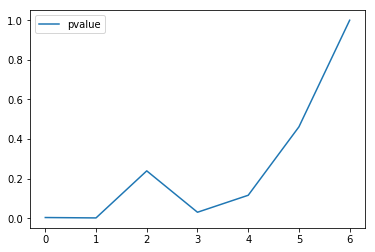

In [40]:
KSTestPerWeekDay('L10939B','L10939C','SCTot').plot(x=None, y='pvalue') 

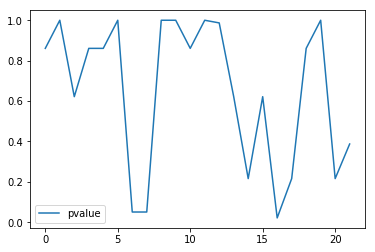

In [41]:
KSTestPerDay('L10939B','L10939C','SCTot').plot(x=None, y='pvalue') 

In [42]:
t = time.time()
KSTestPerWeekDay('L10939B','L10939C','SCTot')
print(time.time()-t)

0.18720006942749023


In [43]:
t = time.time()
KSTestPerDay('L10939B','L10939C','SCTot')
print(time.time()-t)

0.312000036239624


In [44]:
import multiprocessing  
import random
from multiprocessing import Pool
import KSTEST
import numpy as np
def KSTestPerDayParallel(cell1,cell2,kpi):
    if __name__ == '__main__':
        from datetime import timedelta, date, datetime
        pool = Pool()
        t = time.time()
        A = [(cell1,cell2,kpi,day,alldata_kpis) for day in np.array([datetime(2018,8,7)+timedelta(days=i) for i in range(0,22)]) ]
        print(time.time()-t)
        results = pool.starmap(KSTEST.KSTestPerDayParallelFunc, A)
        del A
    return(results)

Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.23.0
Matplotlib version 2.2.2


In [45]:
t = time.time()
results = KSTestPerDayParallel('L10939B','L10939C','SCTot')
print(time.time()-t)

0.0
6.89520001411438


In [47]:
import multiprocessing  
import random
from multiprocessing import Pool
import KSTEST
import numpy as np
def KSTestPerWeekDayParallel(cell1,cell2,kpi):
    if __name__ == '__main__':
        from datetime import timedelta, date, datetime
        pool = Pool()
        A = [(cell1,cell2,kpi,day,alldata_kpis) for day in range(0,7) ]
        results = pool.starmap(KSTEST.KSTestPerWeekDayParallelFunc, A)
        del A
    return(results)

In [48]:
t = time.time()
results = KSTestPerWeekDayParallel('L10939B','L10939C','SCTot')
print(time.time()-t)

5.865599870681763


In [49]:
import multiprocessing  
import random
from multiprocessing import Pool
import KSTEST
import numpy as np
import itertools
def KSTestAllCellsPerDayAverageParallel(ZoneDataFrame,kpi):
    if __name__ == '__main__':
        from datetime import timedelta, date, datetime
        pool = Pool()
        t = time.time()
        C = list(itertools.combinations(ZoneDataFrame['CellName'].unique(),2))
        A = [(ZoneDataFrame, c[0],c[1],kpi) for c in C]
        print(time.time()-t)
        results = pool.starmap(KSTEST.KSTestPerWeekDayAverageParallelFunc, A)
        del A
    return(results)

In [50]:
t = time.time()
wea = KSTestAllCellsPerDayAverageParallel(ResCellsKpi,'CQImoyen')
print(time.time()-t)

0.0
21.68400001525879


In [51]:
t = time.time()
weaGARE = KSTestAllCellsPerDayAverageParallel(GareCellsKpi,'CQImoyen')
print(time.time()-t)

0.0
58.04760026931763


In [52]:
len(GareCellsKpi['CellName'].unique())

47

In [53]:
t = time.time()
wea = KSTestAllCellsPerDayAverage(ResCellsKpi,'CQImoyen')
print(time.time()-t)

92.67960000038147


In [54]:
import multiprocessing  
import random
from multiprocessing import Pool
import KSTEST
import numpy as np
import itertools
def KSTestAllCellsPerWeekDayAverageParallel(ZoneDataFrame,kpi):
    if __name__ == '__main__':
        from datetime import timedelta, date, datetime
        pool = Pool()
        t = time.time()
        C = list(itertools.combinations(ZoneDataFrame['CellName'].unique(),2))
        A = [(ZoneDataFrame, c[0],c[1],kpi) for c in C]
        print(time.time()-t)
        results = pool.starmap(KSTEST.KSTestPerWeekDayAverageParallelFunc, A)
        del A
    return(results)

In [55]:
t = time.time()
allCQImoyen = KSTestAllCellsPerDayAverageParallel(alldata_kpis,'CQImoyen')
print(time.time()-t)

0.031199932098388672
1416.9821999073029


In [76]:
def buildKSTESTMatrixFromMPTEST(result):
    KS = pd.DataFrame()
    for res in result:
        cell1 = res.index.values[0]
        cell2 = res.columns.values[0]
        pvalue = res.loc[res.index.values[0]][res.columns.values[0]] 
        KS.at[str(cell1),str(cell2)] = pvalue
        KS.at[str(cell2),str(cell1)] = pvalue
    KS = KS.fillna(1)
    return(KS)
        

In [78]:
allCQImoyenMatrix = buildKSTESTMatrixFromMPTEST(allCQImoyen)

In [79]:
getIdenticallyDistributedClusters(allCQImoyenMatrix, partialResults=[])

[          L16733B   L10628A   L10628B   D15769A   D15769C   D16733C   D10562C  \
 L16733B  1.000000  0.311157  0.154565  0.164529  0.451384  0.434350  0.200352   
 L10628A  0.311157  1.000000  0.379854  0.204190  0.278494  0.451748  0.206759   
 L10628B  0.154565  0.379854  1.000000  0.188783  0.143082  0.182587  0.382642   
 D15769A  0.164529  0.204190  0.188783  1.000000  0.145606  0.205939  0.267530   
 D15769C  0.451384  0.278494  0.143082  0.145606  1.000000  0.384681  0.155354   
 D16733C  0.434350  0.451748  0.182587  0.205939  0.384681  1.000000  0.195761   
 D10562C  0.200352  0.206759  0.382642  0.267530  0.155354  0.195761  1.000000   
 D10628A  0.364229  0.494536  0.134633  0.226730  0.261988  0.433019  0.148316   
 D10939A  0.206902  0.549642  0.341451  0.271436  0.149135  0.270332  0.370579   
 T16731A  0.487389  0.308299  0.143542  0.167495  0.258998  0.306263  0.113446   
 T16798A  0.589723  0.334178  0.224047  0.292942  0.412761  0.312950  0.295634   
 
           D10

In [80]:
t = time.time()
allTraficDataDL = KSTestAllCellsPerDayAverageParallel(alldata_kpis,'TraficDataDL')
print(time.time()-t)

0.031199932098388672
1370.6209998130798


In [81]:
t = time.time()
allTraficDataUL = KSTestAllCellsPerDayAverageParallel(alldata_kpis,'TraficDataUL')
print(time.time()-t)

0.015599966049194336
2602.581057548523


In [82]:
t = time.time()
allNbrtentatives_QCi5__TEAVoix = KSTestAllCellsPerDayAverageParallel(alldata_kpis,'Nbrtentatives_QCi5__TEAVoix')
print(time.time()-t)

0.031199932098388672
1317.1052086353302


In [83]:
allTraficDataDLMatrix = buildKSTESTMatrixFromMPTEST(allTraficDataDL)

In [84]:
allTraficDataULMatrix = buildKSTESTMatrixFromMPTEST(allTraficDataUL)

In [85]:
allNbrtentatives_QCi5__TEAVoixMatrix = buildKSTESTMatrixFromMPTEST(allNbrtentatives_QCi5__TEAVoix)

In [86]:
writer = pd.ExcelWriter('allcell4KpiKS.xlsx')
allCQImoyenMatrix.to_excel(writer,'CQImoyen')
allTraficDataDLMatrix.to_excel(writer,'TraficDataDL')
allTraficDataULMatrix.to_excel(writer,'TraficDataUL')
allNbrtentatives_QCi5__TEAVoixMatrix.to_excel(writer,'Nbrtentatives_QCi5__TEAVoix')
writer.save()

In [87]:
kpiList = ['CQImoyen','TraficDataDL','Nbrtentatives_QCi5__TEAVoix','TraficDataUL']
AllCell4KPILabels = generateKpiLabeledDataFromExcelKSTEST(r'C:\Users\euripab\Desktop\ML Extraction\allcell4KpiKS.xlsx',kpiList)

In [88]:
AllCell4KPILabels

,Site,Tec,Azimuth,CQImoyen Label,TraficDataDL Label,Nbrtentatives_QCi5__TEAVoix Label,TraficDataUL Label
D10562A,10562.0,0.0,0.0,40.0,2.0,27.0,9.0
D10562B,10562.0,0.0,1.0,11.0,4.0,3.0,2.0
D10562C,10562.0,0.0,2.0,0.0,22.0,21.0,6.0
D10628A,10628.0,0.0,0.0,0.0,7.0,35.0,6.0
D10628B,10628.0,0.0,1.0,36.0,29.0,20.0,25.0
D10628C,10628.0,0.0,2.0,3.0,22.0,9.0,6.0
D10664A,10664.0,0.0,0.0,14.0,7.0,36.0,19.0
D10664B,10664.0,0.0,1.0,3.0,2.0,6.0,3.0
D10664C,10664.0,0.0,2.0,1.0,2.0,13.0,3.0
D10697A,10697.0,0.0,0.0,32.0,5.0,34.0,4.0


In [89]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(AllCell4KPILabels[['Tec','Nbrtentatives_QCi5__TEAVoix Label','TraficDataUL Label','TraficDataDL Label']],AllCell4KPILabels['CQImoyen Label'])
clf.score(AllCell4KPILabels[['Tec','Nbrtentatives_QCi5__TEAVoix Label','TraficDataUL Label','TraficDataDL Label']],AllCell4KPILabels['CQImoyen Label'])

0.9587155963302753

In [90]:
clf.feature_importances_ 

array([0.16374952, 0.29052595, 0.28771474, 0.25800979])

In [91]:
len(getIdenticallyDistributedClusters(allCQImoyenMatrix, partialResults=[]))

77

In [92]:
len(getIdenticallyDistributedClusters(allTraficDataDLMatrix, partialResults=[]))

50

In [93]:
len(getIdenticallyDistributedClusters(allTraficDataULMatrix, partialResults=[]))

53

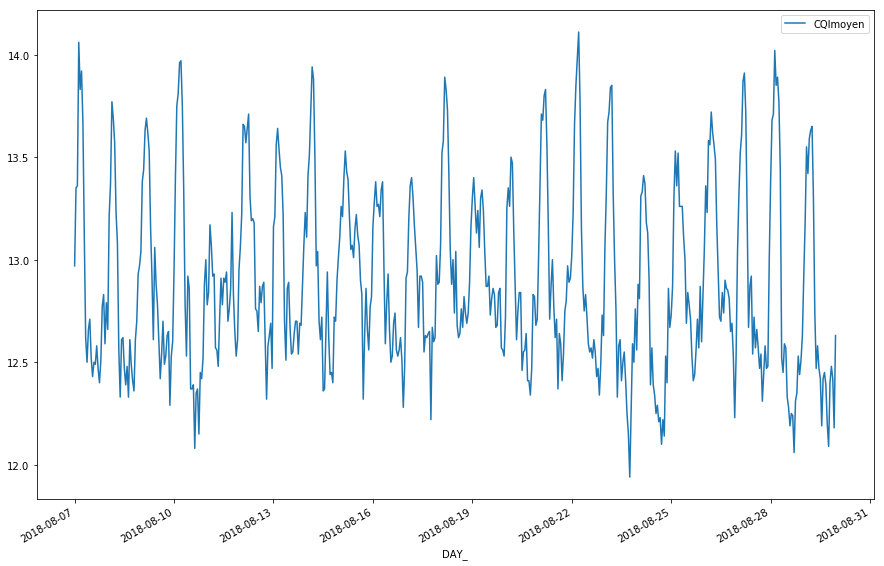

In [101]:
from sklearn.preprocessing import StandardScaler
#Spectral Analysis
L10939C_CQImoyen = alldata_kpis.loc[alldata_kpis['CellName']=='L10939C'][['DAY_','CQImoyen']]
L10939C_CQImoyen['DAY_'] = pd.to_datetime(L10939C_CQImoyen['DAY_'],infer_datetime_format=True)
L10939C_CQImoyen.sort_values(by='DAY_')
L10939C_CQImoyen.plot(x='DAY_',y='CQImoyen',kind='line',figsize = (15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002DB28978>]],
      dtype=object)

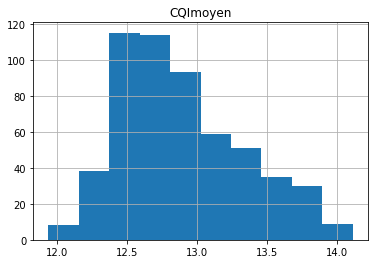

In [102]:
L10939C_CQImoyen.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002F9848D0>]],
      dtype=object)

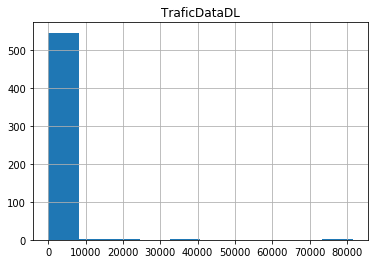

In [107]:
L10939C_TraficDataDL = alldata_kpis.loc[alldata_kpis['CellName']=='L10939C'][['DAY_','TraficDataDL']]
L10939C_TraficDataDL['DAY_'] = pd.to_datetime(L10939C_TraficDataDL['DAY_'],infer_datetime_format=True)
L10939C_TraficDataDL.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000030FA95F8>]],
      dtype=object)

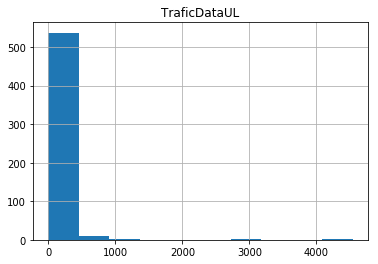

In [109]:
L10939C_TraficDataUL = alldata_kpis.loc[alldata_kpis['CellName']=='L10939C'][['DAY_','TraficDataUL']]
L10939C_TraficDataUL['DAY_'] = pd.to_datetime(L10939C_TraficDataUL['DAY_'],infer_datetime_format=True)
L10939C_TraficDataUL.hist()

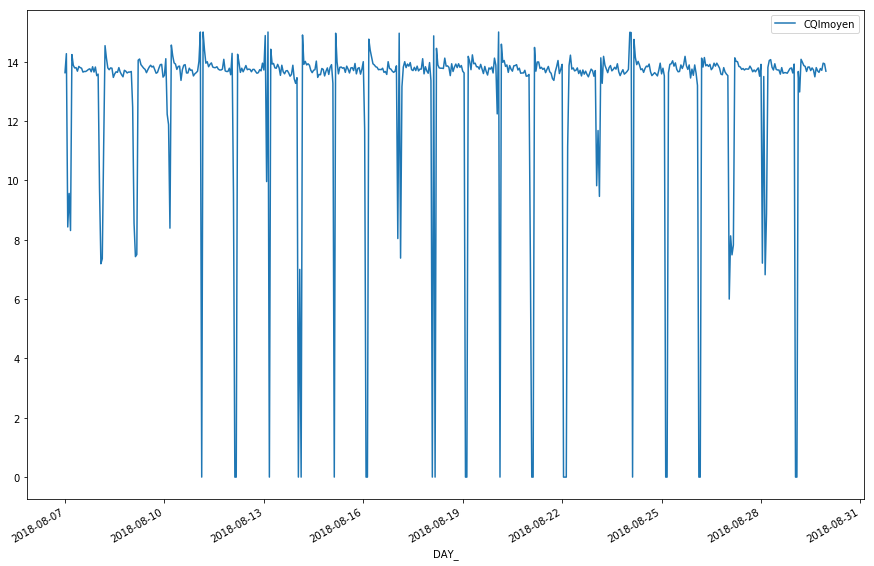

In [103]:

D17617A_CQImoyen = alldata_kpis.loc[alldata_kpis['CellName']=='D17617A'][['DAY_','CQImoyen']]
D17617A_CQImoyen['DAY_'] = pd.to_datetime(D17617A_CQImoyen['DAY_'],infer_datetime_format=True)
D17617A_CQImoyen.sort_values(by='DAY_')
D17617A_CQImoyen.plot(x='DAY_',y='CQImoyen',kind='line',figsize = (15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002F3B8240>]],
      dtype=object)

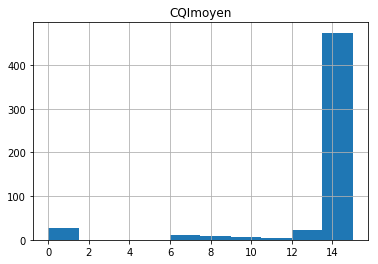

In [104]:
D17617A_CQImoyen.hist()

In [110]:
alldata_kpis

,DAY_,CellName,CQImoyen_Convert,CROZON_DemandesVoix4G,CROZON_NombredeConnexionsPS,CROZON_SucceseRABData4G,CROZON_TraficDataDL4G,CROZON_SucceseRABPS4G,CoupuresData,CROZON_SucceseRABVoix4G,...,TBRetransPDSCH,TBtransPUSCH,SCTot,TBtransPDSCH,PingPong_HOinter_HOOscillation,TraficDataDL,PingPong_HOintra_HOOscillation,TraficDataUL,Traficvoix_Traficvoix_visio,VoIPqualitymeasinsuffstat
0,29/08/2018 00:00,L10939C,12.92,4.0,4094.0,3884.0,3093.64,4891.0,5.0,4.0,...,139743,3051679,0,1992801,2,3093.64,8,173.32,0.00,1
2,29/08/2018 00:00,L11183A,8.49,0.0,15.0,10.0,5.36,14.0,0.0,0.0,...,862,9107,0,47945,0,5.36,2,0.38,0.00,0
3,29/08/2018 00:00,L11183B,11.70,2.0,1331.0,1346.0,247.94,1742.0,0.0,2.0,...,12399,661068,0,301303,0,247.94,21,31.11,0.02,3
4,29/08/2018 00:00,L11183C,11.06,0.0,18.0,13.0,8.77,16.0,0.0,0.0,...,1385,3879,0,27745,0,8.77,6,0.26,0.00,0
6,29/08/2018 00:00,L14837A,14.18,1.0,261.0,183.0,135.00,247.0,1.0,1.0,...,1656,184350,0,87454,2,135.00,3,55.58,0.01,0
7,29/08/2018 00:00,L14837B,14.55,0.0,429.0,338.0,297.71,431.0,2.0,0.0,...,2707,310959,1,123617,1,297.71,0,31.61,0.00,0
18,29/08/2018 00:00,L15229A,12.78,1.0,703.0,526.0,105.97,654.0,1.0,1.0,...,9369,178989,0,147048,0,105.97,2,11.01,0.01,2
19,29/08/2018 00:00,L15229B,13.04,0.0,922.0,934.0,604.13,1050.0,0.0,0.0,...,16704,467050,0,306241,0,604.13,2,129.28,0.00,0
20,29/08/2018 00:00,L15229C,13.52,1.0,398.0,350.0,85.45,460.0,0.0,1.0,...,3542,116479,0,57851,0,85.45,5,5.54,0.01,2
21,29/08/2018 00:00,L15371A,11.81,0.0,401.0,394.0,230.28,478.0,0.0,0.0,...,14258,238587,0,282080,0,230.28,5,14.56,0.01,1
